In [1]:
import torch
torch.__version__

c:\Users\ADMIN\anaconda3\envs\pythonProject\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.11.0+cu113'

In [1]:
import pandas as pd
file=pd.read_pickle('Data/data1.pkl')

In [2]:
file

[{'keypoints': array([[140.67961   ,  28.573212  ,   0.91883314],
         [144.20152   ,  25.0513    ,   0.9528902 ],
         [137.1577    ,  25.0513    ,   0.9348653 ],
         [149.48439   ,  28.573212  ,   0.92764413],
         [133.63579   ,  28.573212  ,   0.9394775 ],
         [158.28917   ,  51.465637  ,   0.9234934 ],
         [128.35292   ,  53.226593  ,   0.88433826],
         [172.37682   ,  72.59712   ,   0.9442148 ],
         [116.02623   ,  74.35808   ,   0.96351516],
         [151.24535   ,  70.83617   ,   0.88565016],
         [138.91866   ,  70.83617   ,   0.86616224],
         [151.24535   ,  95.48956   ,   0.81672454],
         [131.87483   ,  93.72861   ,   0.85996807],
         [145.96248   , 137.7525    ,   0.9321041 ],
         [ 98.41667   , 118.38199   ,   0.94693005],
         [138.91866   , 178.25449   ,   0.8834429 ],
         [137.1577    , 113.09912   ,   0.9026144 ]], dtype=float32),
  'label': array([0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0.,

In [1]:
import cv2 
import os.path as osp
import os
def extract_frame(video_path):
    dname = 'temp'
    os.makedirs(dname, exist_ok=True)
    frame_tmpl = osp.join(dname, 'img_{:05d}.jpg')
    cap = cv2.VideoCapture(video_path)
    frame_paths = []
    cnt = 0
    while(cap.isOpened()):
        flag, frame = cap.read()
        if flag:
            frame_path = frame_tmpl.format(cnt + 1)
            frame_paths.append(frame_path)

            cv2.imwrite(frame_path, frame)
            cnt += 1
            
    return frame_paths


In [ ]:
fp=extract_frame('C:/Users/ADMIN/Videos/Desktop/Desktop 2023.02.10 - 21.10.59.01.mp4')

In [5]:
from mmdet.apis import inference_detector, init_detector
from mmpose.apis import inference_top_down_pose_model, init_pose_model,process_mmdet_results,vis_pose_result
import mmcv
import numpy as np
import shutil

In [3]:
# pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
# pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
# det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
# det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
pose_config = 'Pose/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'Pose/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
det_config = 'Pose/yolox_s_8x8_300e_coco.py'
det_checkpoint = 'Pose/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

load checkpoint from local path: Pose/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
load checkpoint from local path: Pose/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth


In [7]:
img = 'mmpose/tests/data/coco/000000196141.jpg'

In [18]:
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    dataset=pose_model.cfg.data.test.type,
    show=False)

In [9]:
pose_results

[{'bbox': array([245.64508   ,  75.03656   , 414.96185   , 369.94492   ,
           0.93718576], dtype=float32),
  'keypoints': array([[300.06384   , 111.61212   ,   0.972473  ],
         [302.9438    , 108.73215   ,   0.99040234],
         [300.06384   , 105.85217   ,   0.8668133 ],
         [314.46368   , 108.73215   ,   0.90652406],
         [328.86353   , 100.092255  ,   0.81690896],
         [323.10358   , 143.29172   ,   0.8318514 ],
         [354.7832    , 114.492065  ,   0.89744866],
         [297.1839    , 169.2114    ,   0.9438484 ],
         [320.22357   , 131.77185   ,   0.78983617],
         [268.38422   , 154.81158   ,   0.8779819 ],
         [282.78406   , 143.29172   ,   0.868467  ],
         [328.86353   , 215.29083   ,   0.792819  ],
         [346.1433    , 209.53091   ,   0.72145426],
         [325.98352   , 295.92984   ,   0.92598724],
         [279.9041    , 264.2502    ,   0.8876281 ],
         [395.10266   , 327.60947   ,   0.8898416 ],
         [288.544     , 34

In [10]:
returned_outputs

[{}]

In [11]:
vis_result

array([[[ 11,  27,  16],
        [ 13,  26,  18],
        [ 14,  23,  20],
        ...,
        [ 19,  36,  27],
        [ 16,  30,  24],
        [ 14,  28,  22]],

       [[ 17,  33,  22],
        [ 14,  29,  21],
        [ 12,  24,  18],
        ...,
        [ 12,  35,  21],
        [ 11,  27,  16],
        [ 12,  23,  15]],

       [[ 22,  43,  34],
        [ 17,  38,  29],
        [ 13,  31,  24],
        ...,
        [ 10,  35,  21],
        [ 12,  26,  15],
        [ 15,  23,  13]],

       ...,

       [[150, 187, 209],
        [169, 203, 227],
        [169, 200, 225],
        ...,
        [137, 177, 202],
        [137, 177, 202],
        [137, 177, 202]],

       [[154, 193, 215],
        [165, 199, 222],
        [166, 198, 221],
        ...,
        [140, 180, 205],
        [139, 179, 204],
        [136, 176, 201]],

       [[156, 197, 219],
        [148, 187, 209],
        [161, 198, 220],
        ...,
        [129, 166, 192],
        [123, 160, 186],
        [141, 178, 204]]

In [16]:
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)
# cv2.imshow(vis_result)

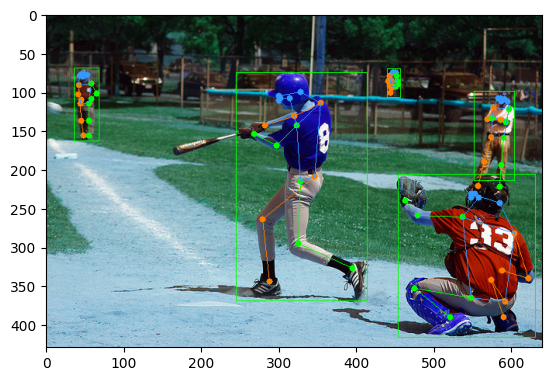

In [19]:
import matplotlib.pyplot  as plt
plt.imshow(vis_result)

In [ ]:
def detection_inference(det_config, det_checkpoint ,frame_paths, det_score_thr=0.5,device='cuda' ):
    model = init_detector(det_config, det_checkpoint, device)
    assert model.CLASSES[0] == 'person', ('We require you to use a detector '
                                          'trained on COCO')
    results = []
    print('Performing Human Detection for each frame')
    prog_bar = mmcv.ProgressBar(len(frame_paths))
    for frame_path in frame_paths:
        result = inference_detector(model, frame_path)
        # We only keep human detections with score larger than det_score_thr
        result = result[0][result[0][:, 4] >= det_score_thr]
        results.append(result)
        prog_bar.update()
    return results

def pose_inference(pose_config,pose_checkpoint, frame_paths, det_results, device='cuda'):
    model = init_pose_model(pose_config, pose_checkpoint, device)
    print('Performing Human Pose Estimation for each frame')
    prog_bar = mmcv.ProgressBar(len(frame_paths))

    num_frame = len(det_results)
    num_person = max([len(x) for x in det_results])
    kp = np.zeros((num_person, num_frame, 17, 3), dtype=np.float32)

    for i, (f, d) in enumerate(zip(frame_paths, det_results)):
        # Align input format
        d = [dict(bbox=x) for x in list(d) if x[-1] > 0.5]
        pose = inference_top_down_pose_model(model, f, d, format='xyxy')[0]
        for j, item in enumerate(pose):
            kp[j, i] = item['keypoints']
        prog_bar.update()
    return kp


def ntu_pose_extraction(vid,det_config, det_checkpoint,pose_config,pose_checkpoint,label, det_score_thr=0.5,device='cuda'):
    frame_paths = extract_frame(vid)
    det_results = detection_inference(det_config, det_checkpoint ,frame_paths, det_score_thr,device)
    image = cv2.imread(frame_paths[0])
    image_shape = (image.shape[0], image.shape[1])
    pose_results = pose_inference(pose_config,pose_checkpoint, frame_paths, det_results, device)
    anno = dict()
    anno['keypoint'] = pose_results[..., :2]
    anno['keypoint_score'] = pose_results[..., 2]
    anno['frame_dir'] = osp.splitext(osp.basename(vid))[0]
    anno['img_shape'] = image_shape
    anno['original_shape'] = image_shape
    anno['total_frames'] = pose_results.shape[1]
    anno['label'] = label
    shutil.rmtree(osp.dirname(frame_paths[0]))
    return anno